# Level-3_Task-2

## Customer Preference Analysis
Analyze the relationship between the type of cuisine and the restaurant's rating.

Identify the most popular cuisines among customers based on the number of votes.

Determine if there are any specific cuisines that tend to receive higher ratings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Dataset.csv')

In [3]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
cuisine_rating = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

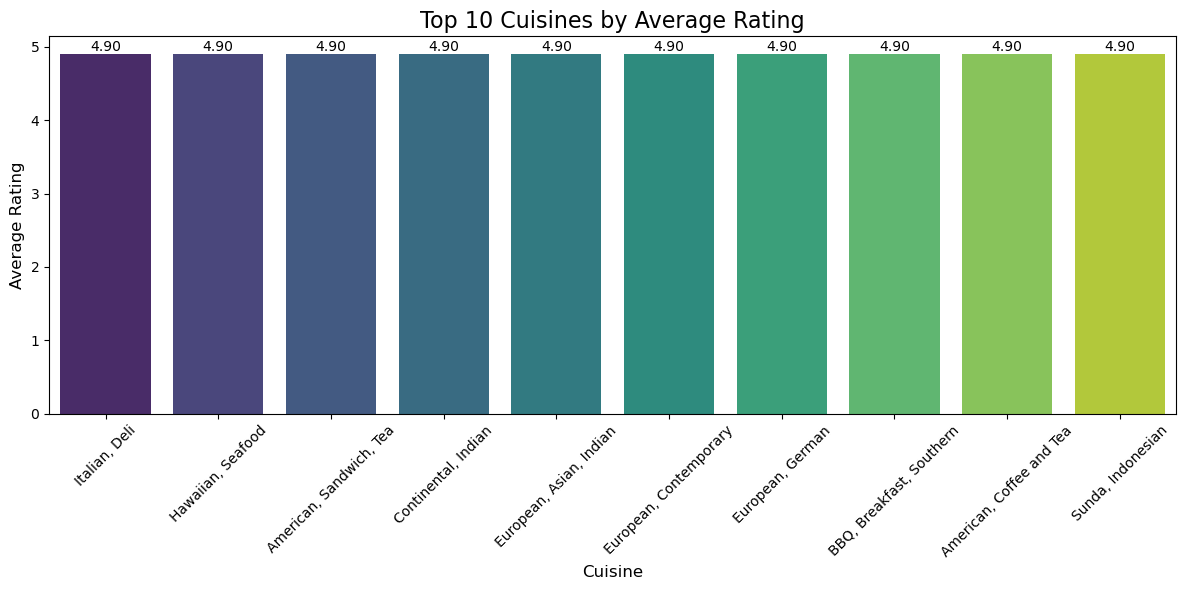

In [7]:
# Sort the cuisine_rating DataFrame and select the top 10 cuisines
top_cuisines = cuisine_rating.head(10)

# Create a figure and axes with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')

# Add labels with values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Top 10 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
cuisine_votes = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

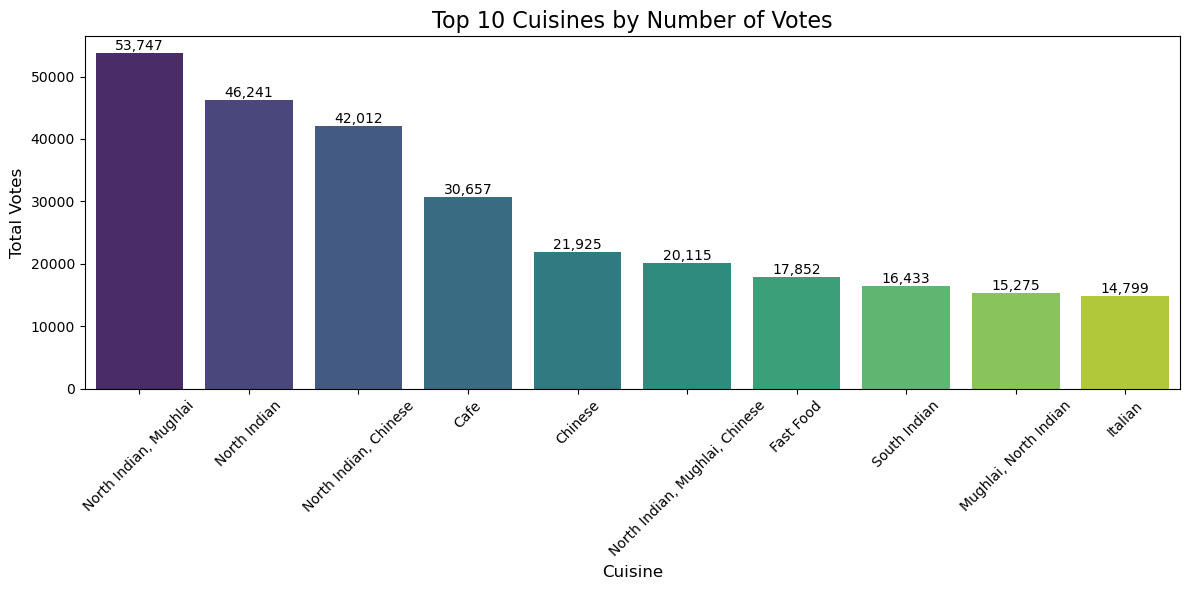

In [9]:
# Sort the cuisine_votes DataFrame and select the top 10 cuisines
top_cuisines = cuisine_votes.head(10)

# Create a figure and axes with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')

# Add labels with values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Top 10 Cuisines by Number of Votes', fontsize=16)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
cuisine_mean_rating = data.groupby('Cuisines')['Aggregate rating'].mean()

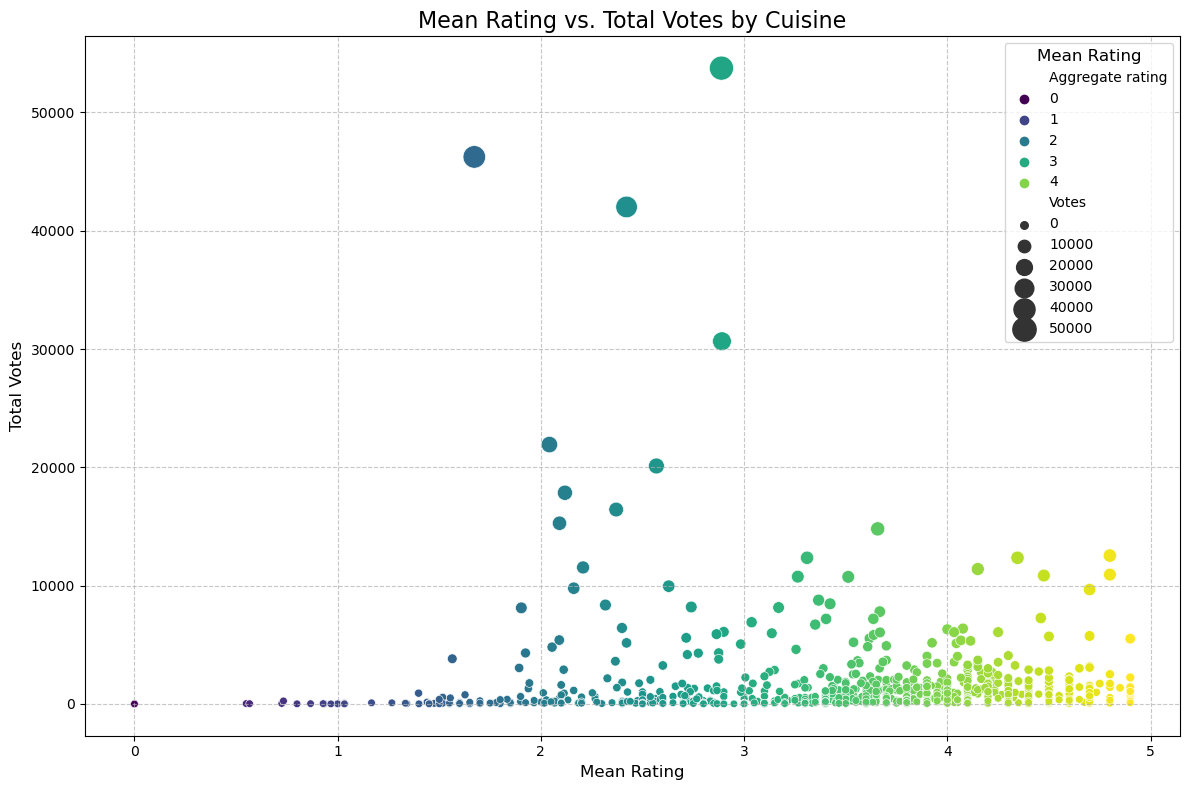

In [12]:
# Create a figure and axes with specified size
plt.figure(figsize=(12, 8))

# Create a scatter plot with enhanced aesthetics
sns.scatterplot(x=cuisine_mean_rating, y=cuisine_votes, hue=cuisine_mean_rating, palette='viridis', size=cuisine_votes, sizes=(30, 300))

# Customize the plot labels and legend
plt.title('Mean Rating vs. Total Votes by Cuisine', fontsize=16)
plt.xlabel('Mean Rating', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.legend(title='Mean Rating', fontsize=10, title_fontsize=12)

# Add gridlines for reference
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
price_range_rating = data.groupby('Price range')['Aggregate rating'].mean()

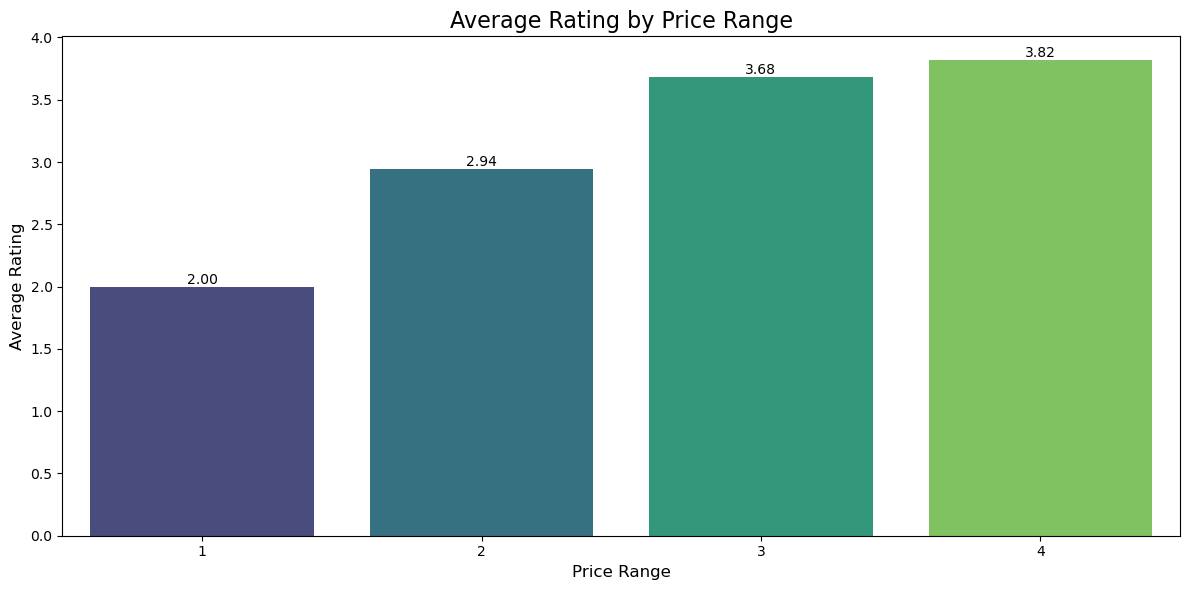

In [14]:
# Sort the price_range_rating DataFrame by index
sorted_price_range_rating = price_range_rating.sort_index()

# Create a figure and axes with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = sns.barplot(x=sorted_price_range_rating.index, y=sorted_price_range_rating.values, palette='viridis')

# Add labels with values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Average Rating by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
table_booking_rating = data.groupby('Has Table booking')['Aggregate rating'].mean()

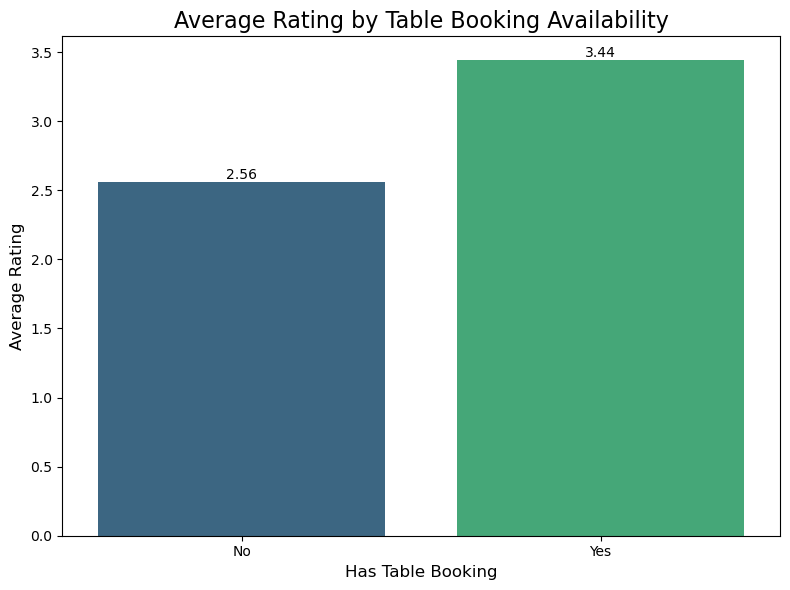

In [16]:
# Sort the table_booking_rating DataFrame by index
sorted_table_booking_rating = table_booking_rating.sort_index()

# Create a figure and axes with specified size
plt.figure(figsize=(8, 6))

# Create a bar plot
ax = sns.barplot(x=sorted_table_booking_rating.index, y=sorted_table_booking_rating.values, palette='viridis')

# Add labels with values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Average Rating by Table Booking Availability', fontsize=16)
plt.xlabel('Has Table Booking', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
online_delivery_rating = data.groupby('Has Online delivery')['Aggregate rating'].mean()

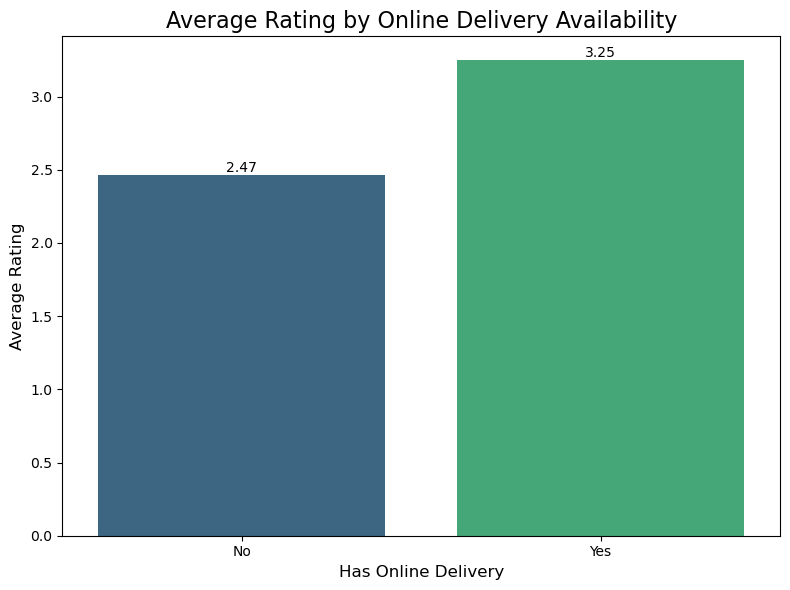

In [18]:
# Sort the online_delivery_rating DataFrame by index
sorted_online_delivery_rating = online_delivery_rating.sort_index()

# Create a figure and axes with specified size
plt.figure(figsize=(8, 6))

# Create a bar plot
ax = sns.barplot(x=sorted_online_delivery_rating.index, y=sorted_online_delivery_rating.values, palette='viridis')

# Add labels with values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Average Rating by Online Delivery Availability', fontsize=16)
plt.xlabel('Has Online Delivery', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

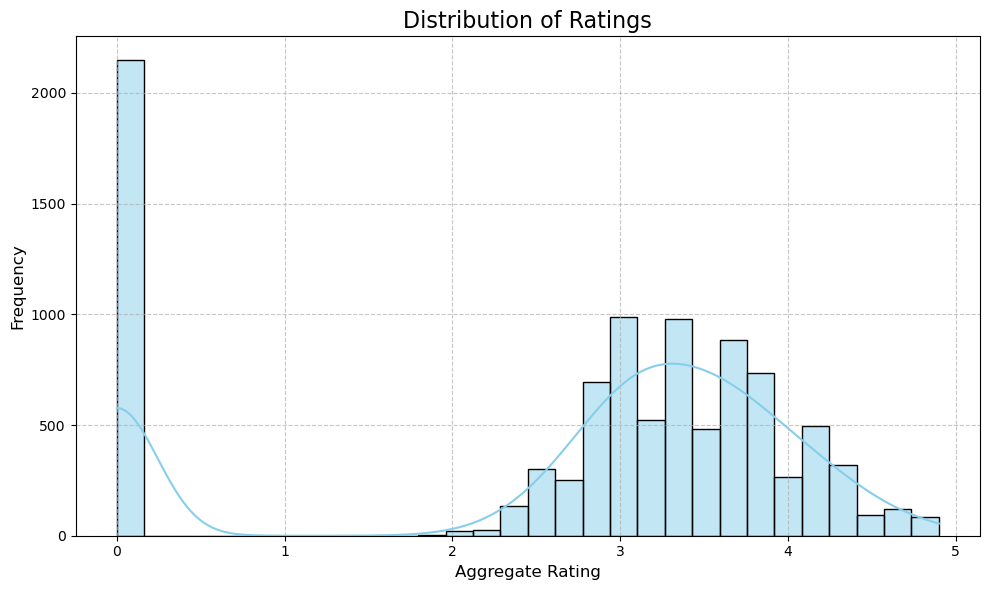

In [19]:
# Create a figure and axes with specified size
plt.figure(figsize=(10, 6))

# Create a histogram plot with enhanced aesthetics
sns.histplot(data['Aggregate rating'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Customize the plot labels
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add gridlines for reference
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

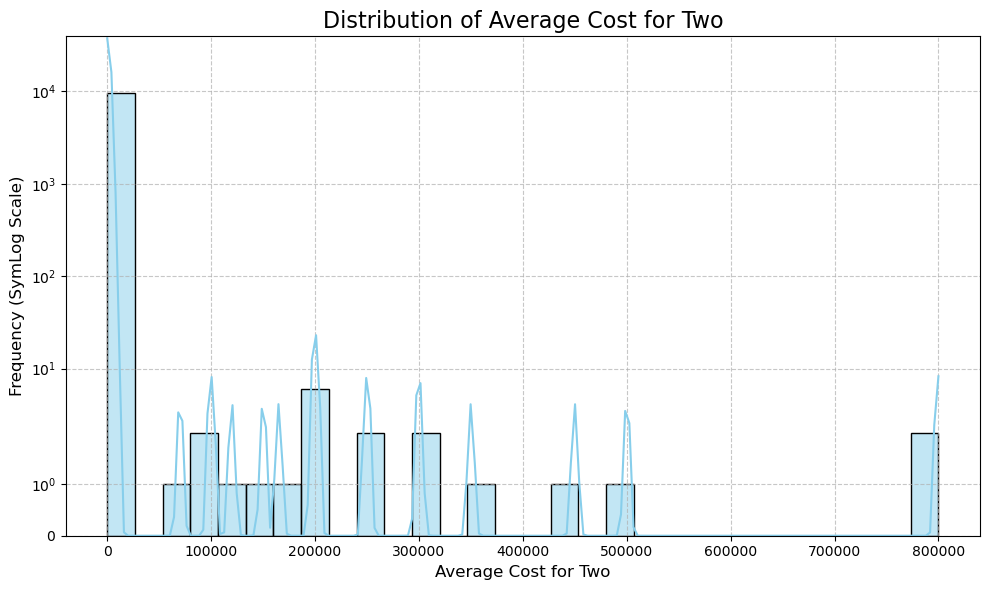

In [23]:
# Create a figure and axes with specified size
plt.figure(figsize=(10, 6))

# Create a histogram plot with enhanced aesthetics and log scale on the y-axis
ax = sns.histplot(data['Average Cost for two'], bins=30, kde=True, color='skyblue', edgecolor='black')
ax.set_yscale('symlog')

# Customize the plot labels
plt.title('Distribution of Average Cost for Two', fontsize=16)
plt.xlabel('Average Cost for Two', fontsize=12)
plt.ylabel('Frequency (SymLog Scale)', fontsize=12)

# Add gridlines for reference
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()